In [1]:
import pandas as pd
import geopandas as gp 
import json
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
%matplotlib inline
from tqdm import tqdm
import glob
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress

In [2]:
files = glob.glob('../BL_Work/openPrescribe/serialized/*.gz')
print files

['../BL_Work/openPrescribe/serialized/201810.gz', '../BL_Work/openPrescribe/serialized/201710.gz', '../BL_Work/openPrescribe/serialized/201203.gz', '../BL_Work/openPrescribe/serialized/201110.gz', '../BL_Work/openPrescribe/serialized/201804.gz', '../BL_Work/openPrescribe/serialized/201308.gz', '../BL_Work/openPrescribe/serialized/201708.gz', '../BL_Work/openPrescribe/serialized/201211.gz', '../BL_Work/openPrescribe/serialized/201707.gz', '../BL_Work/openPrescribe/serialized/201803.gz', '../BL_Work/openPrescribe/serialized/201410.gz', '../BL_Work/openPrescribe/serialized/201301.gz', '../BL_Work/openPrescribe/serialized/201201.gz', '../BL_Work/openPrescribe/serialized/201409.gz', '../BL_Work/openPrescribe/serialized/201812.gz', '../BL_Work/openPrescribe/serialized/201603.gz', '../BL_Work/openPrescribe/serialized/201109.gz', '../BL_Work/openPrescribe/serialized/201512.gz', '../BL_Work/openPrescribe/serialized/201601.gz', '../BL_Work/openPrescribe/serialized/201101.gz', '../BL_Work/openPre

In [3]:
pdp = pd.read_csv('../BL_Work/openPrescribe/serialized/201601.gz',compression='gzip')
pdp.dropna()
for month in [ '201602' , '201603']:
    file_path  = '../BL_Work/openPrescribe/serialized/' + month + '.gz'
    pdp2 = pd.read_csv(file_path,compression='gzip')
    pdp2.dropna()
    pdp.append(pdp2)
    

In [4]:
# pdp_BNF = pd.read_csv('../BL_Work/openPrescribe/serialized_BNF/201601.gz',compression='gzip')
# pdp_BNF.dropna()
# for month in [ '201602' , '201603']:
#     file_path  = '../BL_Work/openPrescribe/serialized_BNF/' + month + '.gz'
#     pdp2 = pd.read_csv(file_path,compression='gzip')
#     pdp2.dropna()
#     pdp_BNF.append(pdp2)

In [5]:
pdp.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,1962,Q44,01C,N81002,0101010G0BBABAB,Maalox_Susp 195mg/220mg/5ml S/F,1.0,3.35,3.11,500.0,...,NaN,NaN,NaN,NaN,220.0,0101010G0,500.0,1.0,500.0,BB
1,1963,Q44,01C,N81002,0101010G0BCABAB,Mucogel_Susp 195mg/220mg/5ml S/F,1.0,2.99,2.77,500.0,...,NaN,NaN,NaN,NaN,220.0,0101010G0,500.0,1.0,500.0,BC
2,1964,Q44,01C,N81002,0101021B0AAALAL,Sod Algin/Pot Bicarb_Susp S/F,4.0,30.72,28.42,3000.0,...,NaN,NaN,NaN,NaN,0.0,0101021B0,3000.0,1.0,3000.0,AA
3,1965,Q44,01C,N81002,0101021B0AAAPAP,Sod Alginate/Pot Bicarb_Tab Chble 500mg,2.0,9.21,8.53,180.0,...,NaN,NaN,NaN,NaN,500.0,0101021B0,180.0,1.0,180.0,AA
4,1966,Q44,01C,N81002,0101021B0BEACAH,Gaviscon_Liq Orig Aniseed Relief,2.0,20.10,18.59,1500.0,...,NaN,NaN,NaN,NaN,0.0,0101021B0,1500.0,1.0,1500.0,BE


In [6]:
# pdp = pd.read_csv('../BL_Work/openPrescribe/serialized/201601.gz',compression='gzip')
# pdp.dropna()


In [7]:
set(pdp['12'])

{nan,
 "Meniere's disease",
 'bipolar',
 "crohn's disease",
 'dementia',
 'depression',
 'diabetes',
 'gastroparesis',
 'hypothyroidism',
 'interstitial cystitis',
 'irritable bowel syndrome',
 'parkinson',
 'psoriasis',
 'rheumatoid',
 'sleep apnea'}

In [8]:
%store -r taxonomyDict

In [9]:
taxonomyDict

{'0702020Z0': {'BNF_Classification': '7.2.2',
  'ChemName': 'Dequalinium Chloride',
  'category': 'Vaginal and Vulval Infections',
  'disease': ''},
 '0202080B0': {'BNF_Classification': '2.2.8',
  'ChemName': 'Bendroflumethiazide/Potassium',
  'category': 'Diuretics With Potassium',
  'disease': ''},
 '0102000L0': {'BNF_Classification': '1.2',
  'ChemName': 'Glycopyrronium Bromide',
  'category': 'Antispasmod.&Other Drgs Alt.Gut Motility',
  'disease': ''},
 '0205040S0': {'BNF_Classification': '2.5.4',
  'ChemName': 'Prazosin Hydrochloride',
  'category': 'Alpha-Adrenoceptor Blocking Drugs',
  'disease': ''},
 '1002010Q0': {'BNF_Classification': '10.2.1',
  'ChemName': 'Pyridostigmine Bromide',
  'category': "Dgs Which Enhance Neuromus'ar Transmi'on",
  'disease': ''},
 '0411000E0': {'BNF_Classification': '4.11',
  'ChemName': 'Rivastigmine',
  'category': 'Dementia',
  'disease': ''},
 '0205051E0': {'BNF_Classification': '2.5.5',
  'ChemName': 'Cilazapril',
  'category': 'Renin-Angiot

In [10]:
disease_drugs = json.load(open("Disease_Drug_DrugBank.json",'rb'))

In [11]:
# pdp.head(n=1000)

In [12]:
ward_pop = pd.read_csv('ward_pop.csv')

/home/sagar/anaconda3/envs/env_py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
ward_pop.head()

,Ward Code 1,Ward Name 1,Local Authority,All Ages,0,1,2,3,4,5,...,81,82,83,84,85,86,87,88,89,90+
0,E05000026,Abbey,Barking and Dagenham,"15,133",351,332,361,311,328,290,...,18,15,22,14,14,19,12,6,10,14
1,E05000027,Alibon,Barking and Dagenham,"10,853",178,185,205,205,196,222,...,31,32,23,22,34,20,14,20,17,59
2,E05000028,Becontree,Barking and Dagenham,"14,466",303,304,285,320,294,271,...,28,25,22,29,19,22,15,19,11,65
3,E05000029,Chadwell Heath,Barking and Dagenham,"11,140",196,176,175,177,199,168,...,60,41,44,43,33,38,35,28,22,146
4,E05000030,Eastbrook,Barking and Dagenham,"11,464",185,156,177,172,165,156,...,54,46,51,56,42,37,28,29,30,139


In [14]:
GP_META = pd.read_csv('../BL_Work/epraccur.csv',header=None)
GP_META.rename(columns={0:'BP_code',
                        1:'Name',
                        2:'Grouping',
                        3:'National_geo',
                        4:'Addr1',
                        5:'Addr2',
                        6:'Addr3',
                        7: 'Addr4',
                        8:'Addr5',
                        9:'Postcode',
                        10:'Open',
                        11:'Closed',
                        12:'Status',
                        13:'Org type code',
                        14:'Commissioner',
                        15:'Join provider',
                        16:'Left provider',
                        17:'Contact',
                        18:'Null1',
                        19:'Null2',
                        20:'Null3',
                        21:'Amended',
                        22:'Null4',
                        23:'Provider',
                        24:'Null5',
                        25:'Setting',
                        26:'Null6'}, 
                 inplace=True)

In [15]:
GP_META.head()

,BP_code,Name,Grouping,National_geo,Addr1,Addr2,Addr3,Addr4,Addr5,Postcode,...,Contact,Null1,Null2,Null3,Amended,Null4,Provider,Null5,Setting,Null6
0,A81001,THE DENSHAM SURGERY,Y63,Q74,THE HEALTH CENTRE,LAWSON STREET,STOCKTON-ON-TEES,CLEVELAND,NaN,TS18 1HU,...,01642 672351,NaN,NaN,NaN,1,NaN,00K,NaN,4,NaN
1,A81002,QUEENS PARK MEDICAL CENTRE,Y63,Q74,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,NaN,TS18 2AW,...,01642 679681,NaN,NaN,NaN,1,NaN,00K,NaN,4,NaN
2,A81003,VICTORIA MEDICAL PRACTICE,Y54,Q74,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,NaN,TS26 8DB,...,01429 272945,NaN,NaN,NaN,0,NaN,00K,NaN,4,NaN
3,A81004,BLUEBELL MEDICAL CENTRE,Y63,Q74,TRIMDON AVENUE,ACKLAM,MIDDLESBROUGH,NaN,NaN,TS5 8SB,...,01642 827697,NaN,NaN,NaN,1,NaN,00M,NaN,4,NaN
4,A81005,SPRINGWOOD SURGERY,Y63,Q74,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,NaN,NaN,TS14 7DJ,...,01287 619611,NaN,NaN,NaN,1,NaN,00M,NaN,4,NaN


In [16]:
Open_filtered_GPs = {}
for index,row in GP_META.iterrows():
    if row ['Setting'] == 4 and row['Status'] =='A':
        Open_filtered_GPs[row['BP_code']] = row['Postcode'].strip()

In [17]:
len(Open_filtered_GPs)

6924

In [18]:
%store Open_filtered_GPs

Stored 'Open_filtered_GPs' (dict)


In [19]:
pdp = pdp[pdp['2'].isin(Open_filtered_GPs.keys())]

In [20]:
# pdp_BNF = pdp_BNF[pdp_BNF['2'].isin(Open_filtered_GPs.keys())]

In [21]:
population = {}
for index, row in ward_pop.iterrows():
    population[row['Ward Code 1']] = float(row['All Ages'].replace(',',''))
    

In [22]:
ward_pop.head()

,Ward Code 1,Ward Name 1,Local Authority,All Ages,0,1,2,3,4,5,...,81,82,83,84,85,86,87,88,89,90+
0,E05000026,Abbey,Barking and Dagenham,"15,133",351,332,361,311,328,290,...,18,15,22,14,14,19,12,6,10,14
1,E05000027,Alibon,Barking and Dagenham,"10,853",178,185,205,205,196,222,...,31,32,23,22,34,20,14,20,17,59
2,E05000028,Becontree,Barking and Dagenham,"14,466",303,304,285,320,294,271,...,28,25,22,29,19,22,15,19,11,65
3,E05000029,Chadwell Heath,Barking and Dagenham,"11,140",196,176,175,177,199,168,...,60,41,44,43,33,38,35,28,22,146
4,E05000030,Eastbrook,Barking and Dagenham,"11,464",185,156,177,172,165,156,...,54,46,51,56,42,37,28,29,30,139


In [23]:
population_borough = {}
for name,group in ward_pop.groupby('Local Authority'):
    population_borough[name] = 0.0
    for index , row in group.iterrows():
        population_borough[name] += float(row['All Ages'].replace(',',''))

In [24]:
sum(population_borough.values())

58381217.0

In [25]:
# compareKeys = set(ward_pop_prev.keys()).intersection(ward_luca_predict.keys())

# pearsonr([ ward_gt[k] for k in compareKeys],[ward_pop_prev[k] for k in compareKeys])

# pearsonr([ ward_gt[k] for k in compareKeys],[ward_pop_prev_BNF[k] for k in compareKeys])

# pearsonr([ ward_gt[k] for k in compareKeys],[ward_luca_predict[k] for k in compareKeys])

# sns.regplot([ ward_gt[k] for k in compareKeys],[ward_pop_prev_BNF[k] for k in compareKeys])

# sns.regplot([ ward_gt[k] for k in compareKeys],[ward_pop_prev[k] for k in compareKeys])

# sns.regplot([ ward_gt[k] for k in compareKeys],[ward_luca_predict[k] for k in compareKeys])

# sns.regplot([ ward_pop_prev[k] for k in compareKeys],[ward_luca_predict[k] for k in compareKeys])
# ax = plt.gca()
# ax.set_title("Comparison between prevalences acquired by BNF and Drugbank drug lists")
# ax.set_xlabel("Drugbank prevalence")
# ax.set_ylabel("BNF prevalence")

# pearsonr([ ward_pop_prev[k] for k in compareKeys],[ward_luca_predict[k] for k in compareKeys])

In [26]:
len(set(ward_pop['Local Authority']))

348

In [27]:
GP_postcodes_long = {}
for name , group in pdp.groupby('2'):
    postcode = list(set(group['10']))
    GP_postcodes_long[name] = str(postcode[0]).strip()

In [28]:
ward_df = pd.read_csv('../BL_Work/pcd11_par11_wd11_lad11_ew_lu.csv')

ward_df.head()

ward_postcode_map = {}
for name, group in ward_df.groupby('wd11cd'):
    ward_postcode_map[name] = list(group['pcds'])

/home/sagar/anaconda3/envs/env_py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (5,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
# ward_postcode_map

In [30]:
luca_data = pd.read_csv('../BL_Work/diabetes_estimates_osward_2016.csv')
ward_gt = {}
ward_luca_predict = {}
ward_patients_gt = {}
for index , row in luca_data.iterrows():
    ward_gt[row['osward']] = float(row['gp_patients_diabetes'])/float(row['gp_patients'])
    ward_patients_gt[row['osward']] = float(row['gp_patients'])
    ward_luca_predict[row['osward']] = row['diabetes_prevalence_estimated_from_prescriptions']

In [31]:
luca_data.head()

,osward,gp_patients,gp_patients_diabetes,diabetes_prevalence_surveys,diabetes_prevalence_estimated_from_prescriptions
0,E05000026,13136,1068,8.1,1.301719
1,E05000027,8954,631,7.0,1.042512
2,E05000028,12032,958,8.0,1.749833
3,E05000029,8853,700,7.9,0.857203
4,E05000030,8813,640,7.3,1.080890


In [32]:
# luca_data['diabetes_prevalence_estimated_from_prescriptions']

(array([ 49., 216., 165., 100.,  41.,  15.,   6.,   8.,   2.,   1.]),
 array([0.26548686, 0.54236786, 0.81924886, 1.09612987, 1.37301087,
        1.64989187, 1.92677287, 2.20365388, 2.48053488, 2.75741588,
        3.03429689]),
 <a list of 10 Patch objects>)

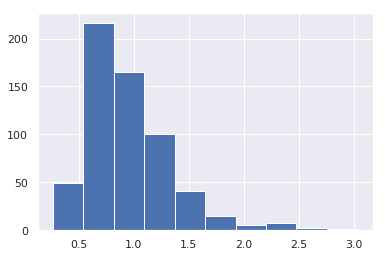

In [33]:
plt.hist(luca_data['diabetes_prevalence_estimated_from_prescriptions'])

In [34]:
# plt.hist(population.values(),bins = 100)

In [35]:
# ward_gt

In [36]:
# ward_postcode_map

In [37]:
%store -r ward_patients_filtered

In [38]:
LSOA_dist = json.load(open('GP_LSOA_PATIENTSDIST.json','rb'))

In [39]:
disease = list(set(pdp[pd.notnull(pdp['12'])]['12']))
print disease

['psoriasis', "Meniere's disease", "crohn's disease", 'gastroparesis', 'irritable bowel syndrome', 'parkinson', 'sleep apnea', 'interstitial cystitis', 'bipolar', 'hypothyroidism', 'dementia', 'rheumatoid', 'depression', 'diabetes']


In [40]:
All_drug_count = {}
for name, group in tqdm(pdp.groupby('2')):
    all_drugs = np.sum(group['19'])
    if name in LSOA_dist:
        for k in LSOA_dist[name]:
            if k not in All_drug_count:
                All_drug_count[k] = 0.0
            All_drug_count[k]+= float(all_drugs)*float(LSOA_dist[name][k])

100%|██████████| 6893/6893 [00:05<00:00, 1174.06it/s]


In [41]:
# All_drug_count.keys()

In [42]:
%store All_drug_count

Stored 'All_drug_count' (dict)


In [43]:
LSOA_disease_drug_count = {}
LSOA_disease_dosage_count = {}
for d in tqdm(disease):
# for d in ['dementia','rheumatoid','dementia','depression','diabetes']:
    if d not in LSOA_disease_drug_count:
        LSOA_disease_drug_count[d]={}
        LSOA_disease_dosage_count[d] = {}
    for name, group in pdp.groupby('2'):
        if name in LSOA_dist:
            disease_presc = group[group['12']==d]
            disease_count = np.sum(disease_presc['5'])
            disease_dosage_count = np.sum(disease_presc['19'])
            for k in LSOA_dist[name]:
                if k not in LSOA_disease_drug_count[d]:
                    LSOA_disease_drug_count[d][k] = 0.0
                if k not in LSOA_disease_dosage_count[d]:
                    LSOA_disease_dosage_count[d][k] = 0.0
                LSOA_disease_dosage_count[d][k]+= float(disease_dosage_count)*float(LSOA_dist[name][k])
                LSOA_disease_drug_count[d][k]+= float(disease_count)*float(LSOA_dist[name][k])

100%|██████████| 14/14 [03:53<00:00, 15.14s/it]


In [44]:
symptom = list(set(pdp[pd.notnull(pdp['13'])]['13']))
print symptom

['indigestion', 'suicidal', 'constipation', 'edema', 'heartburn', 'joint pain', 'dementia', "parkinson's disease", 'syncope', 'muscle pain', 'irritable bowel syndrome', 'diarrhea', 'kidney stone', 'headache', 'fever', 'pain', 'itching', 'arthritis', 'asthenia', 'tremor', 'nausea', 'chronic pain', 'anxiety', 'parkinsonism', 'depressive disorder', 'weight gain', 'urinary incontinence']


In [45]:
LSOA_symptom_drug_count = {}
LSOA_symptom_dosage_count = {}
for d in tqdm(symptom):
# for d in ['dementia','rheumatoid','dementia','depression','diabetes']:
    if d not in LSOA_symptom_drug_count:
        LSOA_symptom_drug_count[d]={}
        LSOA_symptom_dosage_count[d] = {}
    for name, group in pdp.groupby('2'):
        if name in LSOA_dist:
            disease_presc = group[group['13']==d]
            disease_count = np.sum(disease_presc['5'])
            dosage_count = np.sum(disease_presc['19'])
            for k in LSOA_dist[name]:
                if k not in LSOA_symptom_drug_count[d]:
                    LSOA_symptom_drug_count[d][k] = 0.0
                if k not in LSOA_symptom_dosage_count[d]:
                    LSOA_symptom_dosage_count[d][k] = 0.0
                LSOA_symptom_drug_count[d][k]+= float(disease_count)*float(LSOA_dist[name][k])
                LSOA_symptom_dosage_count[d][k]+= float(dosage_count)*float(LSOA_dist[name][k])

100%|██████████| 27/27 [06:44<00:00, 14.73s/it]


In [46]:
# LSOA_disease_drug_count_BNF = {}
# for d in tqdm(disease):
# # for d in ['dementia']:
#     if d not in LSOA_disease_drug_count_BNF:
#         LSOA_disease_drug_count_BNF[d]={}
#     for name, group in tqdm(pdp_BNF.groupby('2')):
#         if name in LSOA_dist:
#             disease_presc = group[group['12']==d]
#             disease_count = np.sum(disease_presc['5'])
#             for k in LSOA_dist[name]:
#                 if k not in LSOA_disease_drug_count_BNF[d]:
#                     LSOA_disease_drug_count_BNF[d][k] = 0.0
#                 LSOA_disease_drug_count_BNF[d][k]+= float(disease_count)*float(LSOA_dist[name][k])

In [47]:
# LSOA_disease_drug_count_BNF

In [48]:
%store -r Ward_prevalence
%store -r Ward_patients
%store -r DiseasePop_byWard

In [49]:
# with open('LSOA_disease_count.json','wb') as f:
#     json.dump(LSOA_disease_drug_count,f)

In [50]:
# %store LSOA_disease_drug_count

In [51]:
# ward_prev_LSOA= {}
# for k in LSOA_disease_drug_count['diabetes']:
#     if LSOA_disease_drug_count['diabetes'][k] > Ward_patients[k]:
#         print LSOA_disease_drug_count['diabetes'][k] , Ward_patients[k]
# #         continue
#     ward_prev_LSOA[k] = LSOA_disease_drug_count['diabetes'][k]/Ward_patients[k]

In [52]:

commonWards = set(ward_gt.keys()).intersection(ward_postcode_map.keys()).intersection(population.keys()).intersection(ward_patients_filtered.keys())

In [53]:
df = pd.read_csv('../BL_Work/Lower_Layer_Super_Output_Area_2011_to_Ward_2015_Lookup_in_England_and_Wales.csv')

In [54]:
df.head()

,LSOA11CD,LSOA11NM,WD15CD,WD15NM,WD15NMW,LAD15CD,LAD15NM,FID
0,E01000104,Barking and Dagenham 014B,E05000041,Village,,E09000002,Barking and Dagenham,1
1,E01000105,Barking and Dagenham 014C,E05000041,Village,,E09000002,Barking and Dagenham,2
2,E01000106,Barking and Dagenham 014D,E05000041,Village,,E09000002,Barking and Dagenham,3
3,E01000107,Barking and Dagenham 010C,E05000041,Village,,E09000002,Barking and Dagenham,4
4,E01000108,Barking and Dagenham 010D,E05000041,Village,,E09000002,Barking and Dagenham,5


In [55]:
wardMap = {}
for name , group in df.groupby('WD15CD'):
        wardMap[name] = list(group['LSOA11CD'])

In [56]:
boroughMap = {}
for name , group in df.groupby('LAD15NM'):
        boroughMap[name] = list(group['LSOA11CD'])

In [57]:
len(wardMap)

8335

In [58]:
Ward_patients

{'AF': {u'E01014080': 1086.4196375767372,
  u'E01014081': 1075.1437672371826,
  u'E01014082': 1102.173557840639,
  u'E01014083': 695.4050408858674,
  u'E01014084': 715.6252891115535,
  u'E01014085': 695.7417088066288,
  u'E01014086': 999.8817138579359,
  u'E01014087': 508.1149928877555,
  u'E01014088': 532.9192180305364,
  u'E01014089': 637.2739109372905,
  u'E01015977': 1899.9472349843581,
  u'E01015976': 1689.8615608700502,
  u'E01015975': 1542.8796987541018,
  u'E01015974': 1385.0207714300668,
  u'E01015973': 2278.5314295956805,
  u'E01015972': 1779.3696674894773,
  u'E01015971': 1545.4540319245316,
  u'E01015970': 1370.8096642005037,
  u'E01015979': 1388.9450800078616,
  u'E01015978': 1295.2068547234182,
  u'E01010259': 1230.2561999851468,
  u'E01010258': 1345.5448634834142,
  u'E01010251': 1520.774250205639,
  u'E01010250': 1417.8178077590765,
  u'E01010253': 1285.383067412056,
  u'E01010252': 1820.7568342553661,
  u'E01010255': 1459.895043117762,
  u'E01010254': 1563.376620180058

In [59]:
ward_prevalence_UK = {}
gt_prevalence_UK = {}

for k in wardMap:
    try:
        disease_presc = np.sum([LSOA_disease_drug_count['dementia'][w] for w in wardMap[k] if not np.isnan(LSOA_disease_drug_count['diabetes'][w])])
        ward_patient_pop = np.sum([Ward_patients['DEM'][w] for w in wardMap[k] if not np.isnan(Ward_patients['DEM'][w])])
        ward_disease_pop = np.sum([DiseasePop_byWard['DEM'][w] for w in wardMap[k] if not np.isnan(DiseasePop_byWard['DEM'][w])])
        ward_prevalence_UK[k] = float(disease_presc)/float(population[k])
        gt_prevalence_UK[k] = float(ward_disease_pop)/float(population[k])
    except:
        print "Some ward had wrong data"

Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data


Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data


Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data


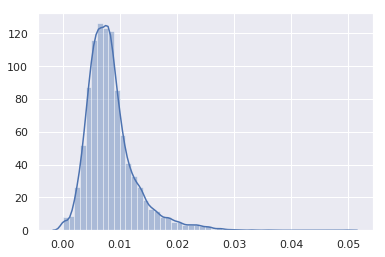

In [60]:
sns.distplot(ward_prevalence_UK.values())

In [61]:
# wardMap = {}
# for name , group in df.groupby('WD15CD'):
#     if name in ward_gt.keys():
#         wardMap[name] = list(group['LSOA11CD'])

In [62]:
# ward_presc_prev = {}
# ward_pop_prev = {}
# ward_pop_prev_BNF = {}
# for k in wardMap:
#     disease_presc = np.sum([LSOA_disease_drug_count['diabetes'][w] for w in wardMap[k] if not np.isnan(LSOA_disease_drug_count['diabetes'][w])])
#     disease_presc_BNF = np.sum([LSOA_disease_drug_count_BNF['diabetes'][w] for w in wardMap[k] if not np.isnan(LSOA_disease_drug_count_BNF['diabetes'][w])])
#     all_presc = np.sum([All_drug_count[w] for w in wardMap[k] ])
#     print disease_presc , all_presc
#     ward_presc_prev[k] = float(disease_presc)/float(all_presc)
#     ward_pop_prev[k] = float(disease_presc)/float(population[k])
#     ward_pop_prev_BNF[k] = float(disease_presc_BNF)/float(population[k])

In [63]:
commonWards_UK = set(ward_prevalence_UK.keys()).intersection(gt_prevalence_UK.keys())

In [64]:
len(commonWards_UK)

7162

Text(0,0.5,'BNF prevalence')

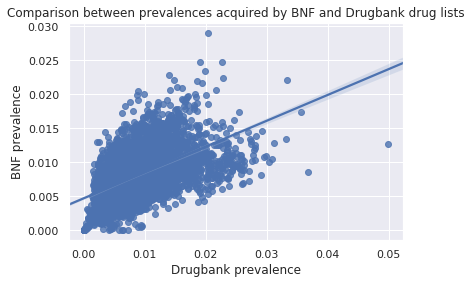

In [65]:
sns.regplot([ ward_prevalence_UK[k] for k in commonWards_UK],[gt_prevalence_UK[k] for k in commonWards_UK])
ax = plt.gca()
ax.set_title("Comparison between prevalences acquired by BNF and Drugbank drug lists")
ax.set_xlabel("Drugbank prevalence")
ax.set_ylabel("BNF prevalence")

In [66]:
pearsonr([ ward_prevalence_UK[k] for k in commonWards_UK],[gt_prevalence_UK[k] for k in commonWards_UK])

(0.5289671725663005, 0.0)

In [67]:
LSOA_disease_drug_count.keys()

['psoriasis',
 "Meniere's disease",
 "crohn's disease",
 'rheumatoid',
 'irritable bowel syndrome',
 'parkinson',
 'sleep apnea',
 'interstitial cystitis',
 'bipolar',
 'hypothyroidism',
 'dementia',
 'gastroparesis',
 'depression',
 'diabetes']

In [68]:
borough_prevalence_UK = {}
borough_gt_prevalence_UK = {}

for k in boroughMap:
    try:
        borough_disease_presc = np.sum([LSOA_disease_dosage_count['dementia'][w] for w in boroughMap[k] if not np.isnan(LSOA_disease_dosage_count['dementia'][w])])
        borough_patient_pop = np.sum([Ward_patients['DEM'][w] for w in boroughMap[k] if not np.isnan(Ward_patients['DEM'][w])])
        borough_disease_pop = np.sum([DiseasePop_byWard['DEM'][w] for w in boroughMap[k] if not np.isnan(DiseasePop_byWard['DEM'][w])])
        borough_prevalence_UK[k] = float(borough_disease_presc)/float(population_borough[k])
        borough_gt_prevalence_UK[k] = float(borough_disease_pop)/float(population_borough[k])
    except:
        print "Some ward had wrong data"

Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data


In [69]:
len(borough_prevalence_UK)

326

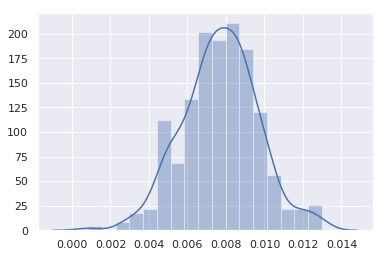

In [70]:
sns.distplot(borough_gt_prevalence_UK.values())

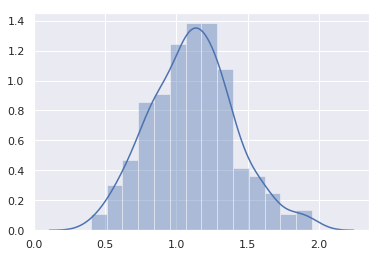

In [71]:
sns.distplot(borough_prevalence_UK.values())

In [72]:
commonWards_UK_borough = set(borough_prevalence_UK.keys()).intersection(borough_gt_prevalence_UK.keys())

Text(0,0.5,'BNF prevalence')

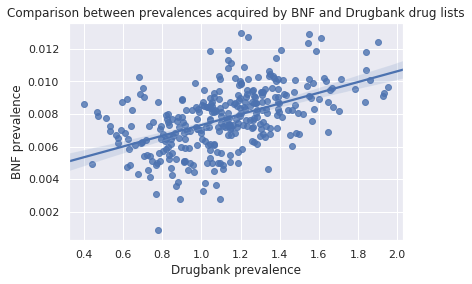

In [73]:
sns.regplot([ borough_prevalence_UK[k] for k in commonWards_UK_borough],[borough_gt_prevalence_UK[k] for k in commonWards_UK_borough])
ax = plt.gca()
ax.set_title("Comparison between prevalences acquired by BNF and Drugbank drug lists")
ax.set_xlabel("Drugbank prevalence")
ax.set_ylabel("BNF prevalence")

In [74]:
pearsonr([ borough_prevalence_UK[k] for k in commonWards_UK_borough],[borough_gt_prevalence_UK[k] for k in commonWards_UK_borough])

(0.5045940374264907, 1.8417273669052263e-22)

In [75]:
LSOA_disease_drug_count.keys()

['psoriasis',
 "Meniere's disease",
 "crohn's disease",
 'rheumatoid',
 'irritable bowel syndrome',
 'parkinson',
 'sleep apnea',
 'interstitial cystitis',
 'bipolar',
 'hypothyroidism',
 'dementia',
 'gastroparesis',
 'depression',
 'diabetes']

In [76]:
borough_prevalence_UK = {}
borough_disease_prescription_count = {}
borough_all_prescription_count = {}
for d in LSOA_disease_drug_count:
    if d not in borough_prevalence_UK:
        borough_prevalence_UK[d] = {}
        borough_disease_prescription_count[d] = {}

        for k in boroughMap:
            try:
                borough_disease_presc = np.sum([LSOA_disease_drug_count[d][w] for w in boroughMap[k] if not np.isnan(LSOA_disease_drug_count[d][w])])
                if k not in borough_all_prescription_count:
                    borough_all_presc = np.sum([All_drug_count[w] for w in boroughMap[k] if not np.isnan(All_drug_count[w])])
                    borough_all_prescription_count[k] = borough_all_presc
                borough_disease_prescription_count[d][k] = borough_disease_presc
                borough_prevalence_UK[d][k] = float(borough_disease_presc)/float(population_borough[k])
            except:
                print "Some ward had wrong data"

Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data


In [77]:
borough_prevalence_UK.keys()

['psoriasis',
 "Meniere's disease",
 "crohn's disease",
 'gastroparesis',
 'irritable bowel syndrome',
 'parkinson',
 'sleep apnea',
 'interstitial cystitis',
 'bipolar',
 'hypothyroidism',
 'dementia',
 'rheumatoid',
 'depression',
 'diabetes']

In [78]:
sum(borough_all_prescription_count.values())

17513258765.604454

In [79]:
# borough_disease_prescription_count['diabetes']

In [80]:
borough_prevalence_UK.keys()

['psoriasis',
 "Meniere's disease",
 "crohn's disease",
 'gastroparesis',
 'irritable bowel syndrome',
 'parkinson',
 'sleep apnea',
 'interstitial cystitis',
 'bipolar',
 'hypothyroidism',
 'dementia',
 'rheumatoid',
 'depression',
 'diabetes']

In [81]:
# borough_prevalence_UK['rheumatoid']

In [82]:
FinalDisease_prevalence = {'2016Q1':borough_prevalence_UK}
# with open('Disease_Prevalence_V4.json','wb') as f:
#     json.dump(FinalDisease_prevalence,f)

In [83]:
symptomList= pd.read_csv("../BL_Work/Dis_sym_edited.csv")
symptomList.head()
normId = {}
for index , row in symptomList.iterrows():
    normId[row['norm_UID'].strip().lower()] = row['UID']

In [84]:
borough_prevalence_Symptom_UK = {}
borough_symptom_prescription_count = {}
for d in LSOA_symptom_drug_count:
    if d not in borough_prevalence_Symptom_UK:
        borough_symptom_prescription_count[d] = {}
        borough_prevalence_Symptom_UK[d] = {}
        borough_prevalence_Symptom_UK[d]['Id'] = normId[d]
        borough_prevalence_Symptom_UK[d]['prev']={}

        for k in boroughMap:
            try:
                borough_disease_presc = np.sum([LSOA_symptom_drug_count[d][w] for w in boroughMap[k] if not np.isnan(LSOA_symptom_drug_count[d][w])])
                borough_symptom_prescription_count[d][k] = borough_disease_presc
                borough_prevalence_Symptom_UK[d]['prev'][k] = float(borough_disease_presc)/float(population_borough[k])
            except:
                print "Some ward had wrong data"

Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data


Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data


In [85]:
borough_disease_prescription_count

{"Meniere's disease": {'Adur': 118.14843307225911,
  'Allerdale': 396.91616874336887,
  'Amber Valley': 379.9121767665085,
  'Arun': 284.82445498291906,
  'Ashfield': 482.92918774843685,
  'Ashford': 255.28448750139754,
  'Aylesbury Vale': 280.88031115268336,
  'Babergh': 192.0459563724599,
  'Barking and Dagenham': 429.17730940260674,
  'Barnet': 427.28678610239024,
  'Barnsley': 1392.2389572769675,
  'Barrow-in-Furness': 335.93848783294675,
  'Basildon': 505.6771563967979,
  'Basingstoke and Deane': 321.68663884701914,
  'Bassetlaw': 550.114227859946,
  'Bath and North East Somerset': 174.8690102769375,
  'Bedford': 259.52342343905576,
  'Bexley': 547.7621272091125,
  'Birmingham': 2411.705210607168,
  'Blaby': 198.08204792420594,
  'Blackburn with Darwen': 450.4432270929899,
  'Blackpool': 563.1466612586008,
  'Bolsover': 445.3135061389754,
  'Bolton': 1046.9498424668968,
  'Boston': 220.3690971428978,
  'Bournemouth': 339.9240375205046,
  'Bracknell Forest': 146.92144673405997,
  '

In [86]:
# borough_prevalence_Symptom_UK

In [87]:
FinalSymptom_prevalence = {'2016Q1':borough_prevalence_Symptom_UK}
# with open('Symptom_Prevalence_V4.json','wb') as f:
#     json.dump(FinalSymptom_prevalence,f)

In [88]:
confidence_disease = json.load(open('../processed/DiseaseConfidence_V2_352.json','rb'))
confidence_symptom = json.load(open('../processed/SymtomConfidence_with_normID_349.json','rb'))

In [89]:

DiseasePrevalence = FinalDisease_prevalence['2016Q1']
SymptomPrevalence = FinalSymptom_prevalence['2016Q1']

In [90]:
DiseasePrevalence['sleep apnea']

{'Adur': 3.552673046556091e-05,
 'Allerdale': 3.7732194025665276e-05,
 'Amber Valley': 6.19905124292371e-05,
 'Arun': 0.00013139186823596857,
 'Ashfield': 0.00019828302892029365,
 'Ashford': 0.00015857188748516615,
 'Aylesbury Vale': 0.00011037633391402306,
 'Babergh': 0.0001582553435076271,
 'Barking and Dagenham': 7.693972702784094e-05,
 'Barnet': 0.00011243966871244269,
 'Barnsley': 0.00011942379805508916,
 'Barrow-in-Furness': 7.345500088912972e-05,
 'Basildon': 0.0001695668123065232,
 'Basingstoke and Deane': 0.00011420321513319157,
 'Bassetlaw': 0.00014595573787347106,
 'Bath and North East Somerset': 0.00010942309007820272,
 'Bedford': 0.00011952430037097622,
 'Bexley': 0.0001707550924341199,
 'Birmingham': 4.3430305453132645e-05,
 'Blaby': 8.398276214606944e-05,
 'Blackburn with Darwen': 0.00012521019856994757,
 'Blackpool': 9.127762663244846e-05,
 'Bolsover': 0.00011013127769815072,
 'Bolton': 6.0513257141048995e-05,
 'Boston': 5.9400831540116204e-05,
 'Bournemouth': 6.6273762

In [91]:
confidence_disease.keys() , DiseasePrevalence.keys()

([u'psoriasis',
  u'gastroparesis',
  u'"multiple+sclerosis"',
  u'"crohn\'s+disease"',
  u'"interstitial+cystitis"',
  u'rheumatoid',
  u'parkinsons',
  u'dysautonomia',
  u'"kidney+stones"',
  u'"chronic+fatigue+syndrome"',
  u'bipolar',
  u'hypothyroidism',
  u'"sleep+apnea"',
  u'"Meniere\'s disease"',
  u'dementia',
  u'"irritable+bowel+syndrome"',
  u'depression',
  u'diabetes'],
 ['psoriasis',
  "Meniere's disease",
  "crohn's disease",
  'gastroparesis',
  'irritable bowel syndrome',
  'parkinson',
  'sleep apnea',
  'interstitial cystitis',
  'bipolar',
  'hypothyroidism',
  'dementia',
  'rheumatoid',
  'depression',
  'diabetes'])

In [92]:
disease = DiseasePrevalence['depression']
confidence = confidence_disease['depression']
disease_arr = []
confidence_arr = []

for k in disease:
    if k in confidence:
        disease_arr.append(disease[k])
        confidence_arr.append(np.mean(confidence[k]))

In [93]:
pearsonr(disease_arr,confidence_arr)

(-0.09575917781276955, 0.08429258115384669)

In [94]:
# disease_confidenceDict = {}
# for d in borough_disease_prescription_count:
#     if d not in disease_confidenceDict:
#         disease_confidenceDict[d] = {}
#     UK_prev = [np.log10(v+1) for v in borough_disease_prescription_count[d].values()]
#     mu_ = np.mean(UK_prev)
#     sigma_ = np.std(UK_prev)
#     print("disease %s , Mean %f , STD %f",d , mu_, sigma_)
#     for k in borough_disease_prescription_count[d]:
#         p = np.log10(float(borough_disease_prescription_count[d][k])+1) 
#         thresh = mu_ - p - 2.0*sigma_ 
# #         thresh = p- (mu_ -2.0*sigma_)
#         print thresh
#         if thresh <= 0:
#             disease_confidenceDict[d][k] = 0.0
#         else:
#             disease_confidenceDict[d][k] = float(p - mu_ - 2*sigma_)/float(p - mu_)

In [95]:
np.square(100)

10000

In [96]:
# disease_confidenceDict = {}
# for d in borough_disease_prescription_count:
#     if d not in disease_confidenceDict:
#         disease_confidenceDict[d] = {}
#     UK_prev = [np.log10(v+1) for v in borough_disease_prescription_count[d].values()]
#     UK_all = [np.log10(v+1) for v in borough_all_prescription_count.values()]
    
#     mu_all = np.mean(UK_all)
#     sigma_all = np.std(UK_all)
    
#     mu_ = np.mean(UK_prev)
#     sigma_ = np.std(UK_prev)
    
#     print("disease %s , Mean %f , STD %f",d , mu_, sigma_)
#     for k in borough_disease_prescription_count[d]:
#         p = np.log10(float(borough_disease_prescription_count[d][k])+1) 
#         p_all = np.log10(float(borough_all_prescription_count[k])+1) 
        
#         thresh = p- (mu_ - 2*sigma_)
#         window = p_all -(mu_all - 2*sigma_all)

#         if window < 0 and thresh < 0:
#             disease_confidenceDict[d][k] = 0.0
#         else:
# #             disease_confidenceDict[d][k] = float(p - 2*sigma_)/float( mu_ -  2*sigma_)
#             disease_confidenceDict[d][k] = 1.0 - 1.0/((thresh + 1)**2.0)
# #             disease_confidenceDict[d][k] = 1.0 - 1.0/((thresh + window+2.0))

In [97]:
# symptom_confidenceDict = {}
# for d in borough_symptom_prescription_count:
#     if d not in symptom_confidenceDict:
#         symptom_confidenceDict[d] = {}
#         symptom_confidenceDict[d]['NormID'] = normId[d]
#         symptom_confidenceDict[d]['confidence'] = {}
#     UK_prev = [np.log10(v+1) for v in borough_symptom_prescription_count[d].values()]
#     UK_all = [np.log10(v+1) for v in borough_all_prescription_count.values()]
    
#     mu_all = np.mean(UK_all)
#     sigma_all = np.std(UK_all)
    
#     mu_ = np.mean(UK_prev)
#     sigma_ = np.std(UK_prev)
#     print("disease %s , Mean %f , STD %f",d , mu_, sigma_)
#     for k in borough_symptom_prescription_count[d]:
#         p = np.log10(float(borough_symptom_prescription_count[d][k])+1) 
#         thresh = p- (mu_ -2*sigma_)
#         window = p_all -(mu_all -2*sigma_all)

#         if window < 0 and thresh < 0:
#             symptom_confidenceDict[d]['confidence'][k] = 0.0
#         else:
# #             symptom_confidenceDict[d]['confidence'][k] = float(p - 2*sigma_)/float( mu_ -  2*sigma_)
#             symptom_confidenceDict[d]['confidence'][k] = 1.0 - 1.0/((thresh + 1)**2.0)
# #             symptom_confidenceDict[d][k] = 1.0 - 1.0/((thresh + window+2.0))

In [98]:
# plt.hist([np.log10(k+1) for k in borough_disease_prescription_count['depression'].values()], bins= 100)

In [99]:
# plt.hist(disease_confidenceDict['depression'].values(), bins= 100)
# ax = plt.gca()
# ax.set_title("Confidence values for depression with $\hat{n}$ = 2 , n = 2")
# ax.set_xlabel("Confidence")
# ax.set_ylabel("Frequency")

In [100]:
# plt.hist(disease_confidenceDict['sleep apnea'].values(), bins= 100)
# ax = plt.gca()
# ax.set_title("Confidence values for depression")
# ax.set_xlabel("Confidence")
# ax.set_ylabel("Frequency")

In [101]:
# disease_confidenceDict['sleep apnea']

In [102]:
# symptom_confidenceDict['chronic pain']

In [103]:
# json.dump(symptom_confidenceDict , open('Confidence_symptom_V5.json','wb'))

In [104]:
# json.dump(disease_confidenceDict , open('Confidence_disease_V5.json','wb'))

In [105]:
# disease_confidenceDict['diabetes'].keys() 

In [106]:
# corrs = []
# table = [["*Disease*"," *corr(prevalence, confidence)*" , "p-value"]]
# for d in DiseasePrevalence:
#     disease = DiseasePrevalence[d]
#     confidence = disease_confidenceDict[d]
#     disease_arr = []
#     confidence_arr = []

#     for k in disease:
#         if k in confidence:
#             disease_arr.append(disease[k])
#             confidence_arr.append(np.mean(confidence[k]))
#     corr = pearsonr(disease_arr,confidence_arr)
#     table.append([d , corr[0] , corr[1]])

In [107]:
# from IPython.display import HTML, display
# import tabulate
# display(HTML(tabulate.tabulate(table, tablefmt='html')))

In [108]:
LSOA_disease_dosage_count.keys()

['psoriasis',
 "Meniere's disease",
 "crohn's disease",
 'rheumatoid',
 'irritable bowel syndrome',
 'parkinson',
 'sleep apnea',
 'interstitial cystitis',
 'bipolar',
 'hypothyroidism',
 'dementia',
 'gastroparesis',
 'depression',
 'diabetes']

In [109]:
DiseasePop_byWard.keys()

['CKD',
 'LD',
 'DM',
 'CHD',
 'COPD',
 'AST',
 'DEP',
 'AF',
 'MH',
 'OB',
 'HYP',
 'PC',
 'OST',
 'PAD',
 'RA',
 'CVDPP',
 'CAN',
 'STIA',
 'HF',
 'EP',
 'DEM']

In [110]:
borough_prevalence_UK = {}
borough_prevalence_dosage_UK = {}
borough_gt_prevalence_UK = {}
disease_key = 'diabetes'
survey_key = 'DM'
for k in tqdm(boroughMap):
    try:
        borough_disease_presc = np.sum([LSOA_disease_drug_count[disease_key][w] for w in boroughMap[k] if not np.isnan(LSOA_disease_drug_count[disease_key][w])])
        borough_disease_dosage_presc = np.sum([LSOA_disease_dosage_count[disease_key][w] for w in boroughMap[k] if not np.isnan(LSOA_disease_dosage_count[disease_key][w])])
        borough_patient_pop = np.sum([Ward_patients[survey_key][w] for w in boroughMap[k] if not np.isnan(Ward_patients[survey_key][w])])
        borough_disease_pop = np.sum([DiseasePop_byWard[survey_key][w] for w in boroughMap[k] if not np.isnan(DiseasePop_byWard[survey_key][w])])
        
#         borough_prevalence_UK[k] = float(borough_disease_presc)/float(population_borough[k])
#         borough_prevalence_dosage_UK[k] = float(borough_disease_dosage_presc)/float(population_borough[k])
#         borough_gt_prevalence_UK[k] = float(borough_disease_pop)/float(population_borough[k])
        borough_prevalence_UK[k] = float(borough_disease_presc)/borough_patient_pop
        borough_prevalence_dosage_UK[k] = float(borough_disease_dosage_presc)/borough_patient_pop
        borough_gt_prevalence_UK[k] = float(borough_disease_pop)/borough_patient_pop
    except:
        print("Some ward had wrong data")

 35%|███▍      | 121/348 [00:00<00:00, 517.37it/s]

Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data


100%|██████████| 348/348 [00:00<00:00, 810.33it/s]

Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data


In [111]:
# DiseasePrevalence['depression']

In [112]:
london_depression = pd.read_csv('mental-health-common-problems-borough.csv')

In [113]:
London_gt = {}
for index , row in london_depression.iterrows():
    London_gt[row['Area']] = float(row['Depressive episode-Rates per 1000 population'])/1000.0

In [114]:
# London_gt

In [115]:
commonWards_UK_borough = set(borough_prevalence_UK.keys()).intersection(London_gt.keys())

In [116]:
# commonWards_UK_borough = [k for k in commonWards_UK_borough if k != 'Dudley']

In [117]:
# sns.regplot([ DiseasePrevalence['depression'][k]/100 for k in commonWards_UK_borough],[London_gt[k] for k in commonWards_UK_borough])
# ax = plt.gca()
# ax.set_title("Comparison between prevalences acquired by BNF and Drugbank drug lists")
# ax.set_xlabel("Drugbank prevalence")
# ax.set_ylabel("BNF prevalence")

In [118]:
# pearsonr([ DiseasePrevalence['depression'][k]  for k in commonWards_UK_borough],[London_gt[k] for k in commonWards_UK_borough])

In [119]:
# sns.regplot([ DiseasePrevalence['dementia'][k] for k in commonWards_UK_borough],[borough_gt_prevalence_UK[k] for k in commonWards_UK_borough])
# ax = plt.gca()
# ax.set_title("Comparison between prevalences acquired by BNF and Drugbank drug lists")
# ax.set_xlabel("Drugbank prevalence")
# ax.set_ylabel("BNF prevalence")

In [120]:
pearsonr([ borough_prevalence_UK[k] for k in commonWards_UK_borough],[borough_gt_prevalence_UK[k] for k in commonWards_UK_borough])

(0.8029137360755226, 1.8874848621213067e-08)

In [121]:
pearsonr([ borough_prevalence_dosage_UK[k] for k in commonWards_UK_borough],[borough_gt_prevalence_UK[k] for k in commonWards_UK_borough])

(0.8908597688871016, 3.771999859271607e-12)

In [122]:
def label_point(x, y, val, ax ):
    a = pd.concat({'x': pd.Series(x), 'y':  pd.Series(y), 'val': pd.Series(val)}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']),fontsize=12)

def filterHighestResiduals(gt,predict,names , topK):
    slope, intercept, r_value, p_value, std_err = linregress(predict,gt)
    predicted = [(slope*k)+intercept for k in gt]
    residuals = [abs(v1 - v2) for (v1,v2) in zip(predicted,predict)]
    topKidx = np.argsort(residuals)[-topK:][::-1]
    return [gt[i] for i in topKidx] , [predict[i] for i in topKidx], [names[i] for i in topKidx]

predict = []
predict_dose = []
gt = []
names = []
for k in commonWards_UK_borough:
    predict.append(borough_prevalence_UK[k]*1000.0)
    predict_dose.append(borough_prevalence_dosage_UK[k]*10)#*1000.0)
    names.append(k)
    gt.append(borough_gt_prevalence_UK[k]*1000.0)

# predict

corr1 = pearsonr(predict,gt)
corr2 = pearsonr(predict_dose,gt)
print corr1 , corr2

(0.8029137360755227, 1.8874848621212928e-08) (0.8908597688871013, 3.771999859271789e-12)


In [126]:
disease_string = 'Diabetes'

Text(0.1,0.8,'r = 0.80')

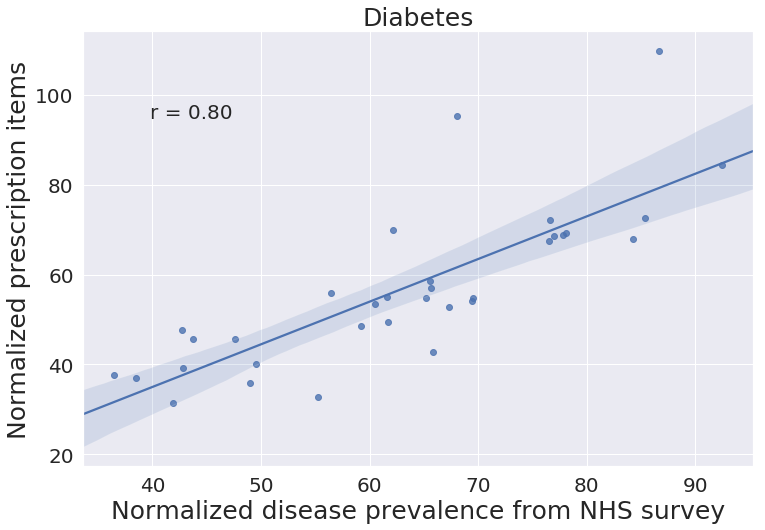

In [127]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x=gt , y = predict)
ax = plt.gca()
# gt_ , predict_ , names_ = filterHighestResiduals(gt, predict , names, 10)
# label_point(gt , predict , names , ax)
ax.set_title(disease_string ,fontsize=25)
plt.xticks(fontsize = 20 )
plt.yticks(fontsize = 20 )
ax.set_xlabel("Normalized disease prevalence from NHS survey",fontsize=25)
ax.set_ylabel("Normalized prescription items",fontsize=25)
ax.annotate("r = " +  str(corr1[0])[:4], xy=(0.1, 0.8), xycoords='axes fraction',fontsize = 20)

Text(0.1,0.8,'r = 0.89')

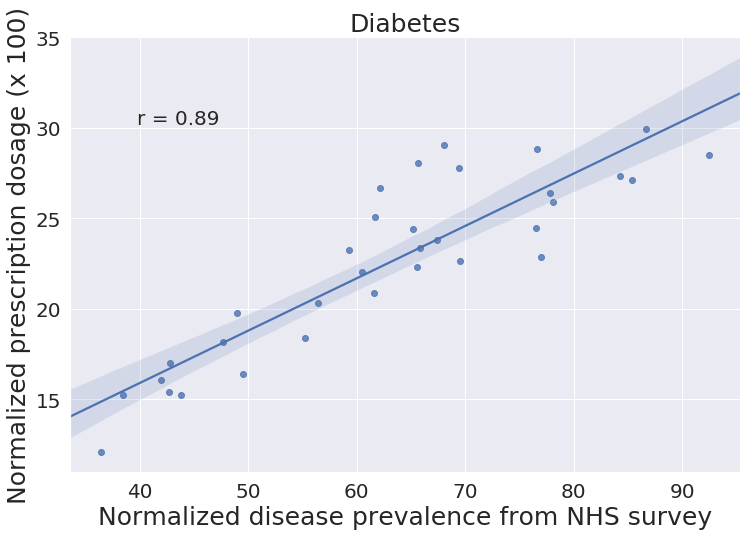

In [128]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x=gt , y = predict_dose)
ax = plt.gca()
# gt_ , predict_ , names_ = filterHighestResiduals(gt, predict , names, 10)
# label_point(gt , predict_dose , names , ax)
ax.set_title(disease_string ,fontsize=25)
plt.xticks(fontsize = 20 )
plt.yticks(fontsize = 20 )
ax.set_xlabel("Normalized disease prevalence from NHS survey",fontsize=25)
ax.set_ylabel("Normalized prescription dosage (x 100)",fontsize=25)
ax.annotate("r = " +  str(corr2[0])[:4], xy=(0.1, 0.8), xycoords='axes fraction',fontsize = 20)